Saving student-por.xlsx to student-por.xlsx
Shape: (649, 33)

Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    

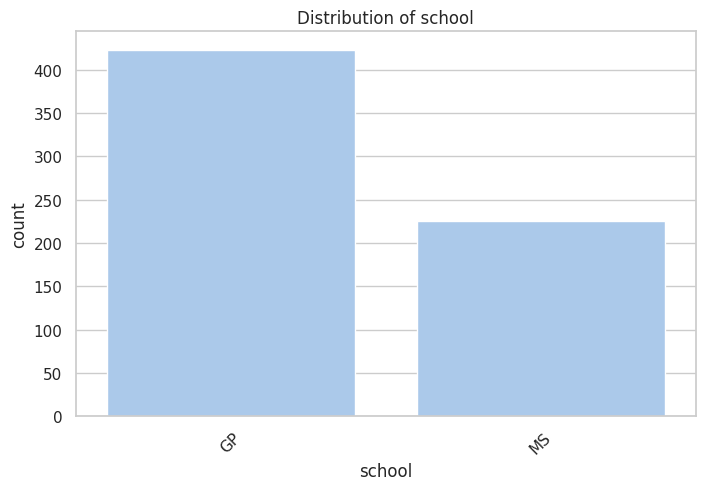

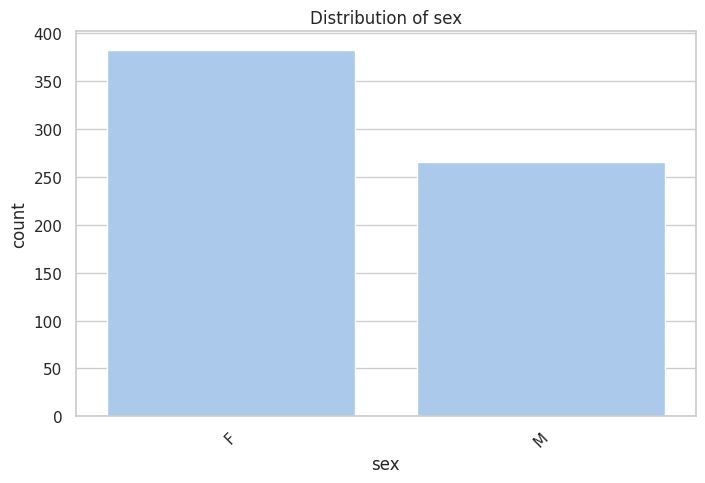

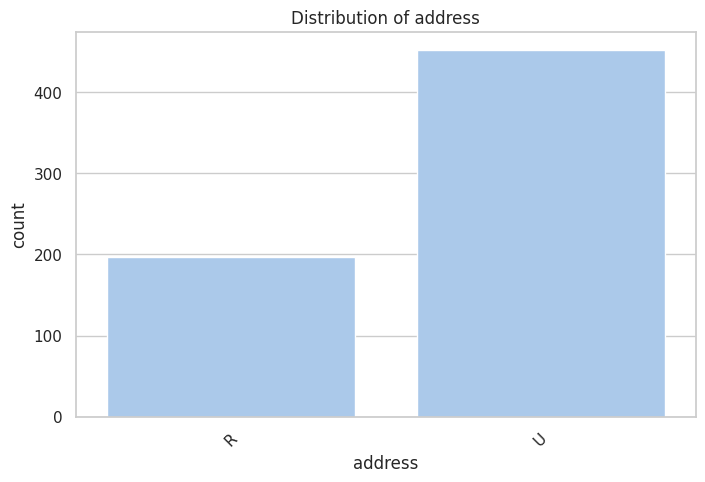

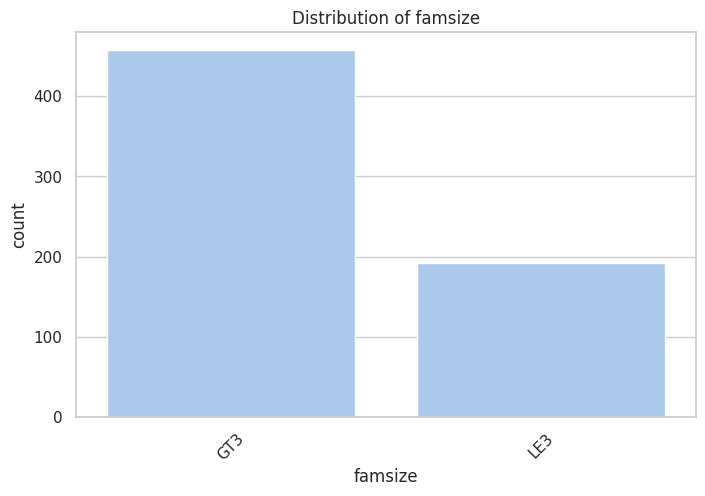

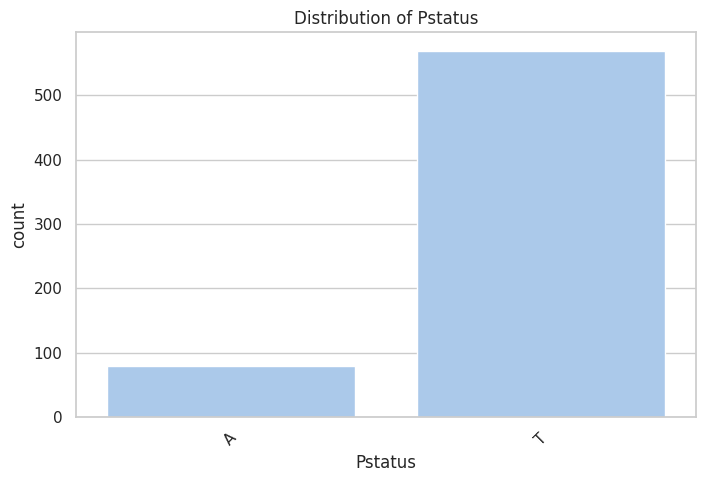

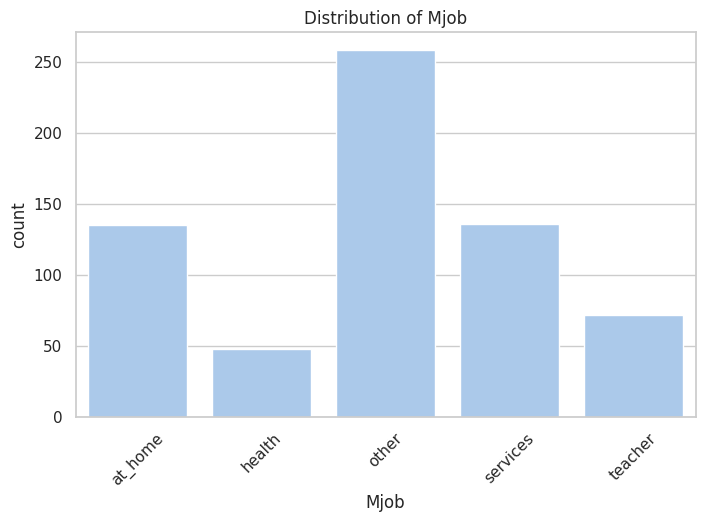

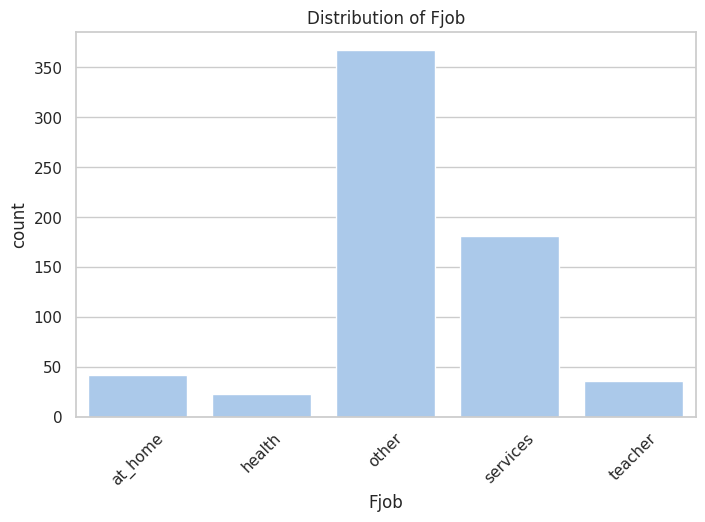

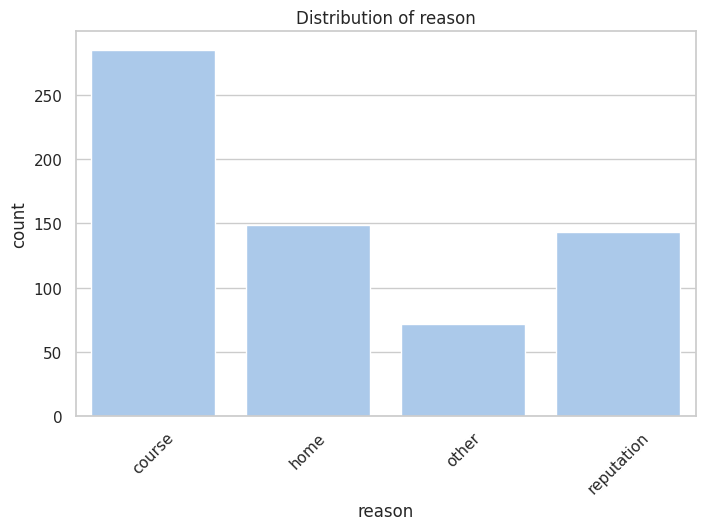

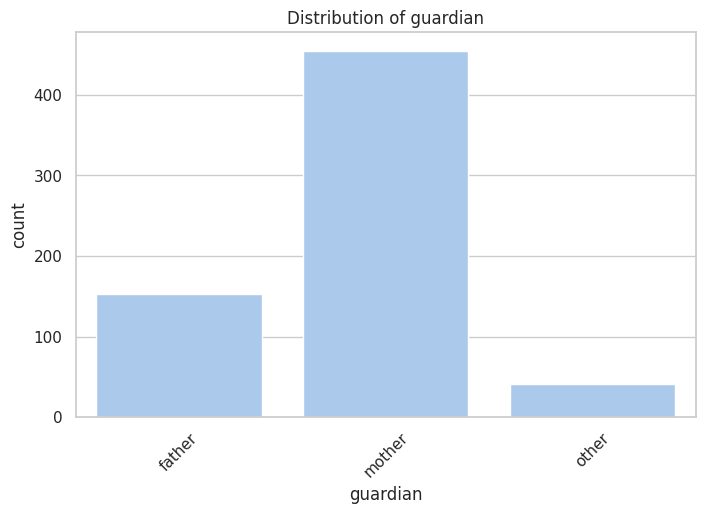

In [9]:
from google.colab import files
uploaded = files.upload()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('student-por.xlsx')
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Basic info
df.head()
df.info()
df.describe()

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Drop missing and duplicate rows
df = df.dropna()
df = df.drop_duplicates()

# Convert categorical columns
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                    'Mjob', 'Fjob', 'reason', 'guardian']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Create derived columns
df['total_alcohol'] = df['Dalc'] + df['Walc']
df['avg_grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)
df['passed'] = df['G3'].apply(lambda x: 'yes' if x >= 10 else 'no')

# ===== EDA: Univariate (Categorical) =====
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (8, 5)

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()



